<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Heatmaps

Ao fazer uma análise, um dos pontos que precisamos ter em mente é a correlação entre as variáveis. Nem sempre conseguimos entender as correlações simplesmente por visualizar as diferentes variáveis.

Por isso, é sempre interessante plotarmos heatmaps, para deixar essas relações mais evidentes. Mas existem alguns truques que podemos utilizar para ter resultados ainda mais interessantes e informativos.

<center><img src="https://matplotlib.org/stable/_images/sphx_glr_image_annotated_heatmap_002.png"width="450px"></center>

Além disso, não temos somente essa visualização acima, a clássica matriz de correlação, demonstrada como heatmap. Nós também podemos utilizar heatmaps diferentes, assim como os da [Darkhorse Analytics]() que demonstra o fluxo de pessoas por New York City ao longo de um dia de trabalho.

<center><img src="https://images.squarespace-cdn.com/content/v1/56713bf4dc5cb41142f28d1f/1615244110919-OXSIQX5YB8L7KRJ81YL8/breathing-city.gif?format=750w"width="400px"></center>

Vamos nos aprofundar nesse tipo de gráfico, e ver como podemos criar um gráfico simples, mas informativo e poderoso utilizando as bibliotecas de visualização `Matplotlib` e `Seaborn`.

<center><img src="https://images.squarespace-cdn.com/content/v1/56713bf4dc5cb41142f28d1f/1549327610655-O9TDHQUSMZD86NP4E8TL/Screen+Shot+2019-02-04+at+5.46.00+PM.png?format=750w"width="400px"></center>

## Plotar o Heatmap

Antes de criar uma heatmap, precisamos criar uma matriz de correlação. Para isso, vamos, mais uma vez, utilizar nosso dataset com dados sobre a dengue.

Além disso, utilizaremos a biblioteca `seaborn` para plotar o nosso heatmap.

In [ ]:
# importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# importar dados para dataframe
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/dengue-dataset.csv"
df = pd.read_csv(DATA_PATH)

# ver as 5 primeiras entradas
df.head()

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
0,1998-01-01,237,179.2,25.7,20.2,28.1
1,1998-02-01,331,226.3,25.1,20.0,28.0
2,1998-03-01,562,149.1,24.8,22.4,27.2
3,1998-04-01,187,46.4,22.7,18.1,26.0
4,1998-05-01,32,88.3,19.2,15.7,22.9


Com os dados carregados, a primeira coisa que precisamos fazer é criar uma matriz de correlação. Tendo isso, podemos utilizar dessa matriz para plotar um heatmap, que irá trazer essas informações de uma forma mais atrativa visualmente.

In [ ]:
# criando uma matriz de correlação
df_corr = df.corr()
df_corr

<ipython-input-2-72507b79f038>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
casos-confirmados,1.000000,-0.083691,0.041172,0.037013,0.026151
chuva,-0.083691,1.000000,0.492732,0.487643,0.393733
temperatura-media,0.041172,0.492732,1.000000,0.885326,0.893091
temperatura-mininima,0.037013,0.487643,0.885326,1.000000,0.685034
temperatura-maxima,0.026151,0.393733,0.893091,0.685034,1.000000


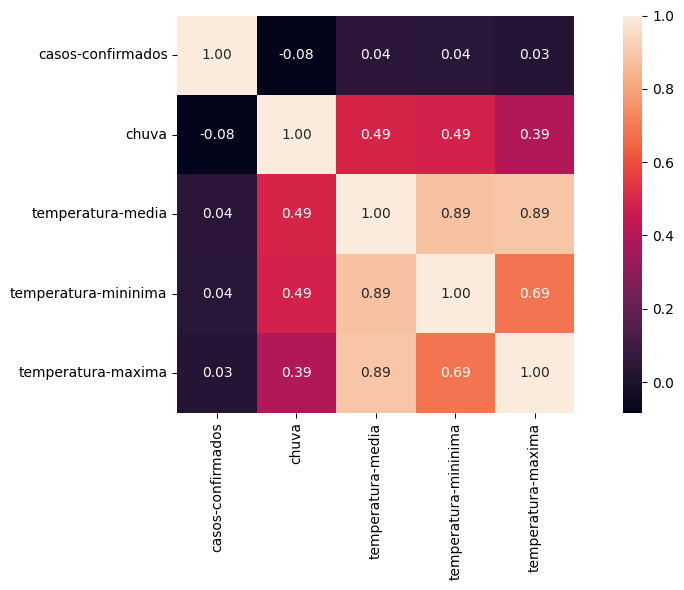

In [ ]:
# plotando o  heatmap
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(df_corr, fmt='.2f', square=True, linecolor='white', vmax=1.0, annot=True);

plt.tight_layout()

Até aqui, já tivemos uma ideia interessante da correlação e conseguimos plotar algo visualmente atrante. Mas será que podemos ir além?

É claro que sim!!

Nesse caso, temos poucas variáveis a serem analisadas, o que torna o entendimento mais fácil. Mas esse nem sempre será o caso. Podemos ter, por exemplo, dezenas de variáveis, e correlações que são difíceis de entender.

Com isso em mente, vamos mostrar outras duas coisas que podemos fazer para tirar mais valor dos heatmaps.

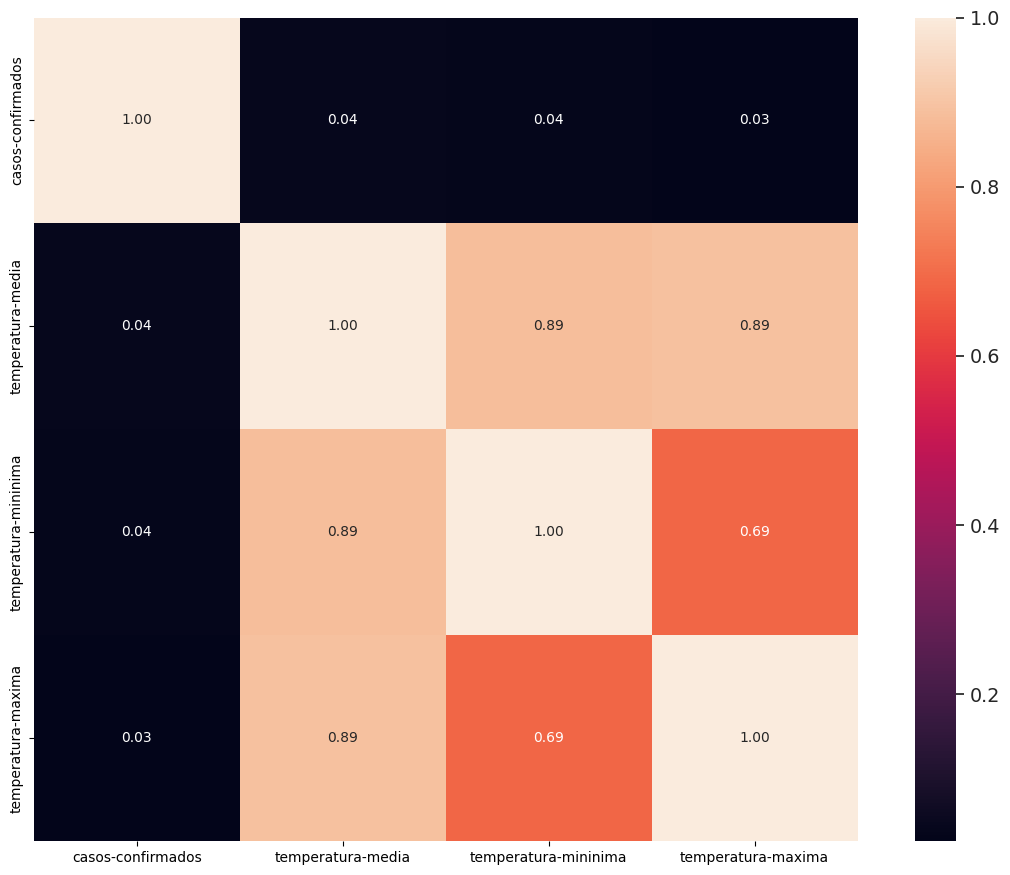

In [ ]:
# número de variáveis a serem selecionadas
k = 4

# encontrando as variáveis mais correlacionadas
cols = df_corr.nlargest(k, 'casos-confirmados')['casos-confirmados'].index
cm = np.corrcoef(df[cols].values.T)

# plotando o heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()